In [957]:
# === Imports ===
# Step 1.1: Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/htesthtrain/hacktest.csv
/kaggle/input/htesthtrain/hacktrain.csv


In [958]:
# Step 1.2: Load training & test datasets

# Training Set
train_df = pd.read_csv("/kaggle/input/htesthtrain/hacktrain.csv")
train_df #ignore the warnings

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [959]:
# Test Set
test_df = pd.read_csv("/kaggle/input/htesthtrain/hacktest.csv")
test_df.shape

(2845, 29)

In [960]:
# Step 1.3: Drop "Unnamed: 0" if exists (it's just a row index column)
if "Unnamed: 0" in train_df.columns:
    train_df.drop(columns=["Unnamed: 0"], inplace=True)
if "Unnamed: 0" in test_df.columns:
    test_df.drop(columns=["Unnamed: 0"], inplace=True)

In [961]:
# Step 1.4: Preview data
print("Train shape:", train_df.shape)

Train shape: (8000, 29)


In [962]:
print("Test shape:", test_df.shape)

Test shape: (2845, 28)


In [963]:
print(train_df.head())
print(" ")

   ID  class  20150720_N  20150602_N  20150517_N  20150501_N  20150415_N  \
0   1  water    637.5950     658.668   -1882.030    -1924.36     997.904   
1   2  water    634.2400     593.705   -1625.790    -1672.32     914.198   
2   4  water     58.0174   -1599.160         NaN    -1052.63         NaN   
3   5  water     72.5180         NaN     380.436    -1256.93     515.805   
4   8  water   1136.4400         NaN         NaN     1647.83    1935.800   

   20150330_N  20150314_N  20150226_N  ...  20140610_N  20140525_N  \
0   -1739.990     630.087         NaN  ...         NaN   -1043.160   
1    -692.386     707.626   -1670.590  ...         NaN    -933.934   
2   -1564.630         NaN     729.790  ...    -1025.88     368.622   
3   -1413.180    -802.942     683.254  ...    -1813.95     155.624   
4         NaN    2158.980         NaN  ...     1535.00    1959.430   

   20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  20140202_N  \
0   -1942.490     267.138         NaN        

In [964]:
print(train_df["class"].value_counts())  # Check label distribution

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [965]:
# Step 1.5: Identify NDVI columns
ndvi_cols = [col for col in train_df.columns if col.endswith("_N")]
print("NDVI feature columns:", ndvi_cols)


NDVI feature columns: ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


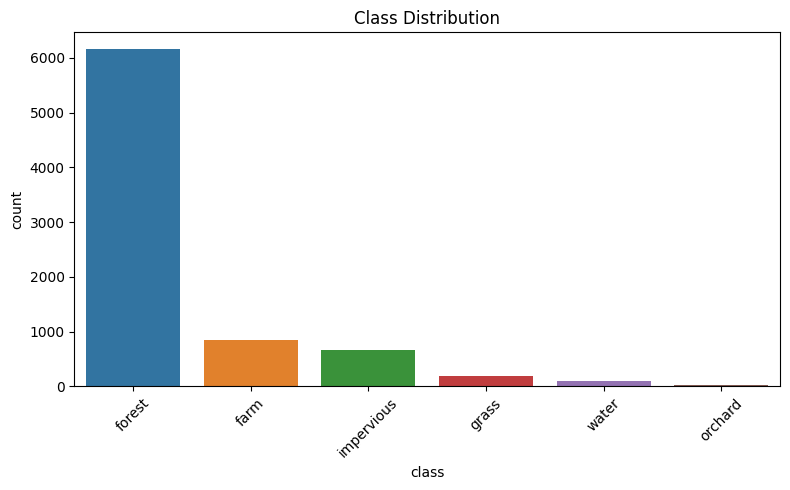

In [966]:
# Step 1.6: Plot class distribution
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x="class", order=train_df["class"].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

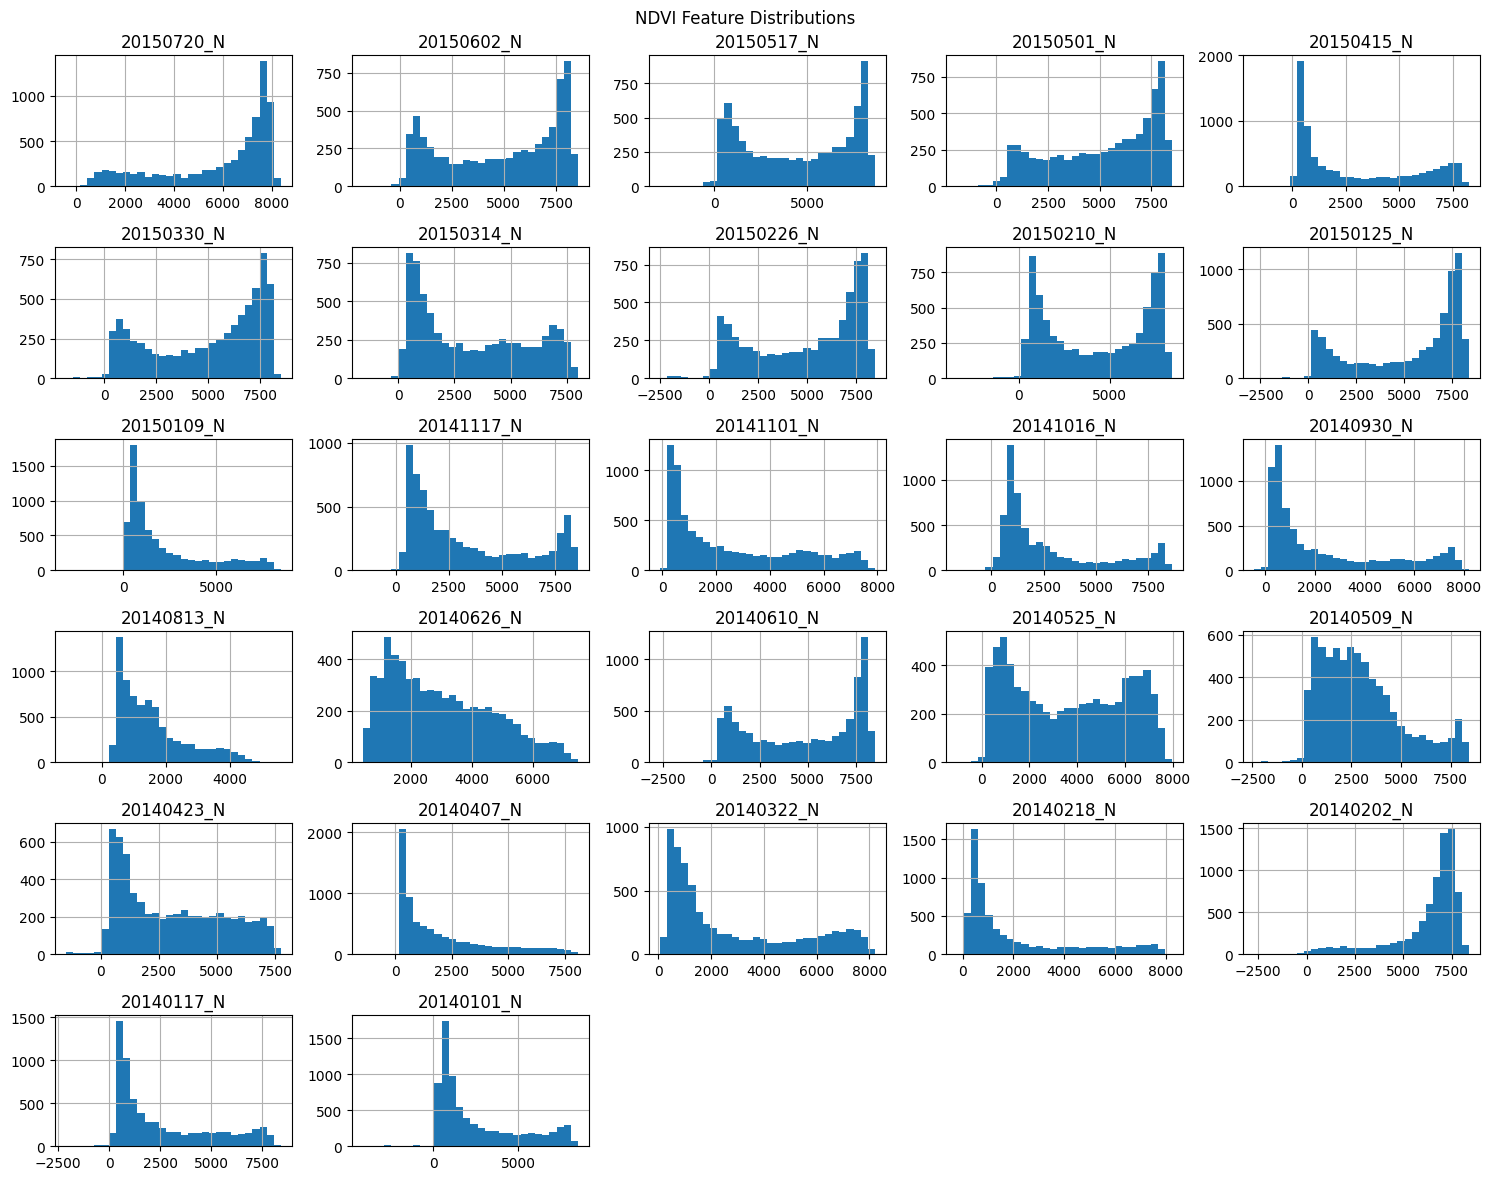

In [967]:
# Step 1.7: Plot NDVI feature distributions
train_df[ndvi_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("NDVI Feature Distributions")
plt.tight_layout()
plt.show()

In [968]:
# Step 2.1: Check missing values in NDVI columns
missing_percent = train_df[ndvi_cols].isnull().mean() * 100
print("Missing % per NDVI column:\n", missing_percent)

Missing % per NDVI column:
 20150720_N     7.0
20150602_N    15.0
20150517_N    10.0
20150501_N    12.0
20150415_N     6.0
20150330_N    14.0
20150314_N     9.0
20150226_N    17.0
20150210_N     8.0
20150125_N    13.0
20150109_N    11.0
20141117_N    16.0
20141101_N     5.0
20141016_N    18.0
20140930_N    10.0
20140813_N     7.0
20140626_N    20.0
20140610_N     6.0
20140525_N     9.0
20140509_N    11.0
20140423_N    22.0
20140407_N     8.0
20140322_N    14.0
20140218_N    18.0
20140202_N     7.0
20140117_N    15.0
20140101_N     5.0
dtype: float64


In [969]:
# Step 2.2: Fill missing NDVI values with median
train_df[ndvi_cols] = train_df[ndvi_cols].fillna(train_df[ndvi_cols].median())

In [970]:
# Step 2.3: Confirm all missing NDVI values are handled
print("Remaining NDVI NaNs:", train_df[ndvi_cols].isnull().sum().sum())

Remaining NDVI NaNs: 0


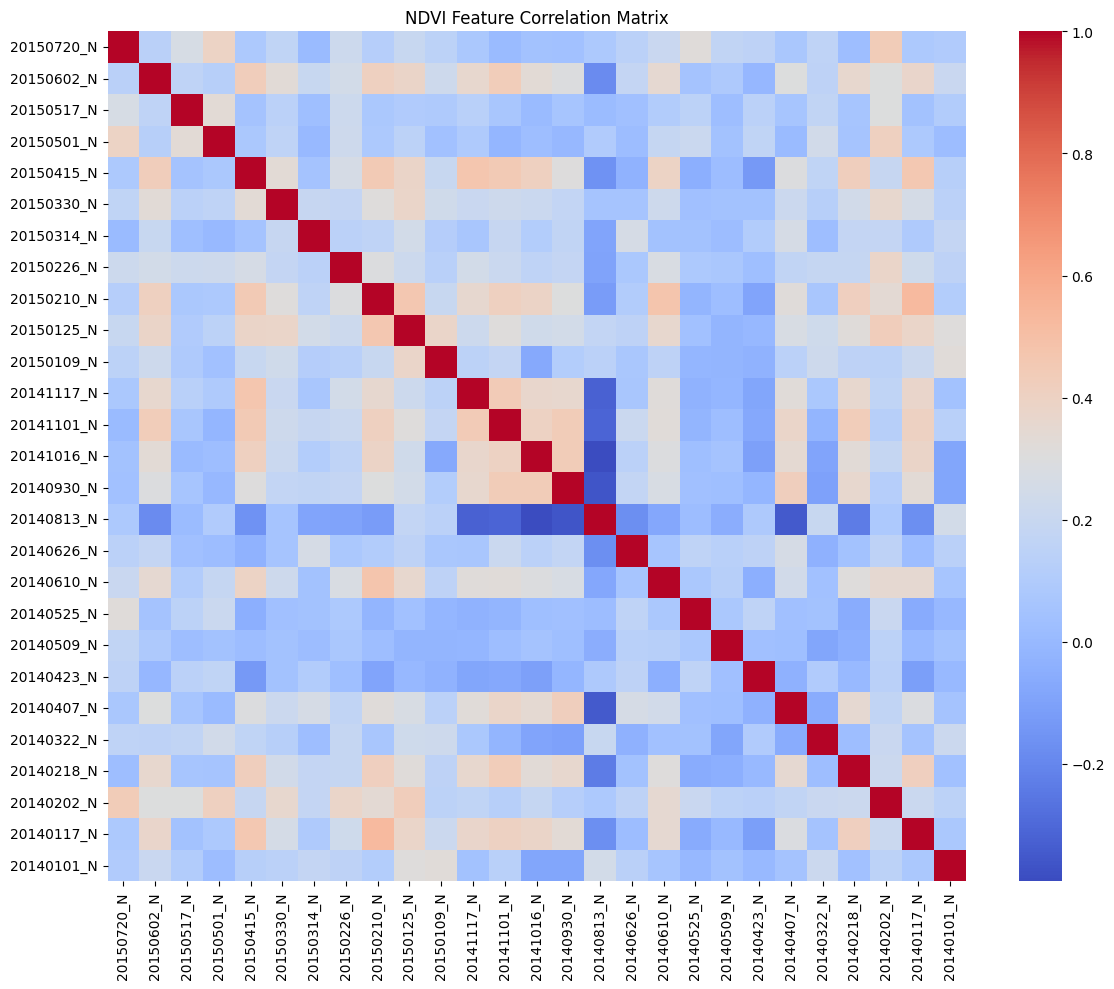

In [971]:
# Step 2.4: Visualize NDVI correlations
plt.figure(figsize=(12,10))
corr_matrix = train_df[ndvi_cols].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("NDVI Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [972]:
# ----------------------------------------
# STEP 3.1: Feature Engineering
# ----------------------------------------

ndvi_cols = [col for col in train_df.columns if 'ndvi' in col]


In [973]:
# Step 3.2: Encode target labels (from text to numeric)
def add_ndvi_stats(df):
    df['ndvi_mean'] = df[ndvi_cols].mean(axis=1)
    df['ndvi_std'] = df[ndvi_cols].std(axis=1)
    df['ndvi_max'] = df[ndvi_cols].max(axis=1)
    df['ndvi_min'] = df[ndvi_cols].min(axis=1)
    df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
    return df

train_df = add_ndvi_stats(train_df)
test_df = add_ndvi_stats(test_df)


In [974]:
# STEP 3.3: Train-validation split (done before scaling now)
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['class'])  # keep original

In [975]:
# STEP 3.4: Scaling features
extended_features = ndvi_cols + ['ndvi_mean', 'ndvi_std', 'ndvi_max', 'ndvi_min', 'ndvi_range']

X = train_df[extended_features]
y = train_df['label']

X_train_df, X_val_df, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [976]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 4.1: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_val = scaler.transform(X_val_df)
X_test = scaler.transform(test_df[extended_features])


In [977]:
# STEP 4.2
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=15,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [978]:
#STEP 4.3
val_preds = best_xgb.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)

print("✅ Validation Accuracy:", val_acc)
print("\nClassification Report:\n", classification_report(y_val, val_preds))


✅ Validation Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.77      1.00      0.87      1232
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        21

    accuracy                           0.77      1600
   macro avg       0.13      0.17      0.15      1600
weighted avg       0.59      0.77      0.67      1600



In [979]:
# STEP 4.4:Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(y_val, val_preds))


Confusion Matrix:
 [[   0  168    0    0    0    0]
 [   0 1232    0    0    0    0]
 [   0   39    0    0    0    0]
 [   0  134    0    0    0    0]
 [   0    6    0    0    0    0]
 [   0   21    0    0    0    0]]


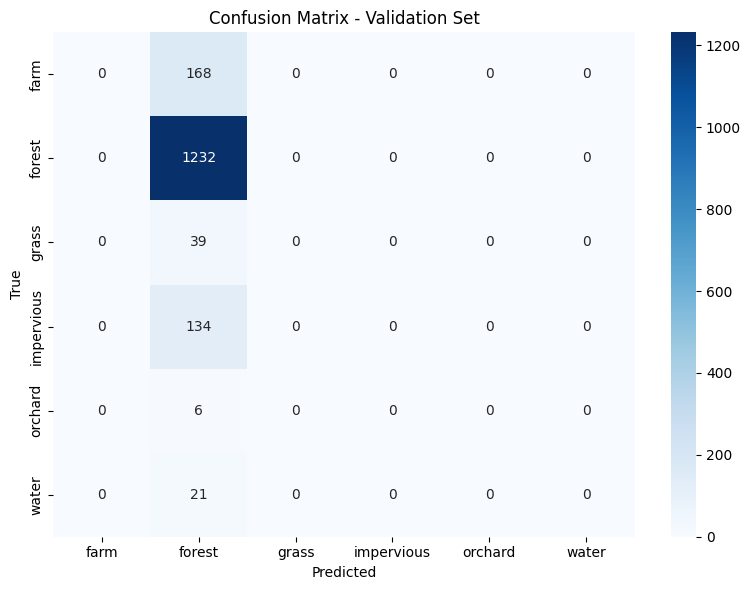

In [980]:
# Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_val, val_preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Validation Set")
plt.tight_layout()
plt.show()

In [981]:
# STEP 5.1: Load test data again (if needed)
test_df = pd.read_csv("/kaggle/input/htesthtrain/hacktest.csv")

In [982]:
# STEP 5.2: Drop "Unnamed: 0" if it exists
if "Unnamed: 0" in test_df.columns:
    test_df.drop(columns=["Unnamed: 0"], inplace=True)

In [983]:
# STEP 5.3: Handle missing values in test set
test_df[ndvi_cols] = test_df[ndvi_cols].fillna(train_df[ndvi_cols].median())

In [984]:
# STEP 5.4: Scale test set using the SAME scaler as training
test_df = add_ndvi_stats(test_df)  # Ensure derived features are added
test_df_scaled = scaler.transform(test_df[extended_features])


In [985]:
# STEP 5.5: Predict class labels for test set
# Predict on test set with best XGB model



In [986]:
# STEP 5.6: Convert encoded predictions back to original class names
test_preds_encoded = best_xgb.predict(test_df_scaled)
test_preds = label_encoder.inverse_transform(test_preds_encoded)



In [987]:
# STEP 5.7: Create submission dataframe
submission_df = pd.DataFrame({
    "id": test_df.index,
    "class": test_preds
})

In [988]:
# STEP 5.8: Save submission to CSV

submission_df.to_csv("xgb_tuned_submission.csv", index=False)
print("*--------Filee--------*")
submission_df.head()


*--------Filee--------*


,id,class
0,0,forest
1,1,forest
2,2,forest
3,3,forest
4,4,forest
